In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

print("Features in the DataFrame => {}".format(df.columns.ravel()))

Features in the DataFrame => ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age'
 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism'
 'Handicap' 'SMSReceived' 'NoShow']


In [4]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Gender 'F' -> 0, 'M' -> 1
df['Gender'] = df['Gender'].replace('F', 0).replace('M', 1)
# NoShow 'No' -> 0, 'Yes' -> 1
df['NoShow'] = df['NoShow'].replace('No', 0).replace('Yes', 1)

# Print Unique Values
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))
print("Unique Values in `Scholarship` => {}".format(df.Scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(df.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.Handicap.unique()))
print("Unique Values in `SMSReceived` => {}".format(df.SMSReceived.unique()))
print("Unique Values in `NoShow` => {}".format(df.NoShow.unique()))

df.head()

Unique Values in `Gender` => [0 1]
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMSReceived` => [0 1]
Unique Values in `NoShow` => [0 1]


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


[12535, 62510, 9784, 25698]


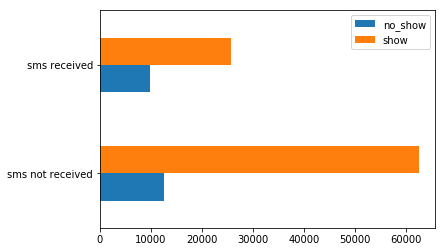

In [5]:
sms = df['SMSReceived'].tolist()
noshow = df['NoShow'].tolist()

sms_noshow_list = []
for i in range(len(df)):
    sms_noshow_list.append((sms[i], noshow[i]))
np.array(sms_noshow_list)

no_sms_noshow = sms_noshow_list.count((0,1))
no_sms_show = sms_noshow_list.count((0,0))
sms_noshow = sms_noshow_list.count((1,1))
sms_show = sms_noshow_list.count((1,0))
print([no_sms_noshow, no_sms_show, sms_noshow, sms_show])

sms_df = pd.DataFrame({'no_show':[no_sms_noshow, sms_noshow], 'show':[no_sms_show, sms_show]},
                      index=['sms not received', 'sms received'])
sms_df.plot(kind='barh')

[14594, 57246, 7725, 30962]


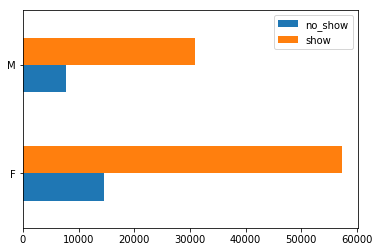

In [6]:
gender = df['Gender'].tolist()
noshow = df['NoShow'].tolist()

gender_noshow_list = []
for i in range(len(df)):
    gender_noshow_list.append((gender[i], noshow[i]))
np.array(gender_noshow_list)

female_noshow = gender_noshow_list.count((0,1))
female_show = gender_noshow_list.count((0,0))
male_noshow = gender_noshow_list.count((1,1))
male_show = gender_noshow_list.count((1,0))
print([female_noshow, female_show, male_noshow, male_show])

gender_df = pd.DataFrame({'no_show':[female_noshow, male_noshow], 'show':[female_show, male_show]},
                      index=['F', 'M'])
gender_df.plot(kind='barh')

[18547, 70179, 3772, 18029]


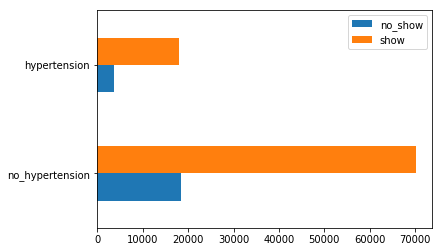

In [7]:
hypertension = df['Hypertension'].tolist()
noshow = df['NoShow'].tolist()

hypertension_noshow_list = []
for i in range(len(df)):
    hypertension_noshow_list.append((hypertension[i], noshow[i]))
np.array(hypertension_noshow_list)

no_hypertension_noshow = hypertension_noshow_list.count((0,1))
no_hypertension_show = hypertension_noshow_list.count((0,0))
hypertension_noshow = hypertension_noshow_list.count((1,1))
hypertension_show = hypertension_noshow_list.count((1,0))
print([no_hypertension_noshow, no_hypertension_show, hypertension_noshow, hypertension_show])

hypertension_df = pd.DataFrame({'no_show':[no_hypertension_noshow, hypertension_noshow], 'show':[no_hypertension_show, hypertension_show]},
                      index=['no_hypertension', 'hypertension'])
hypertension_df.plot(kind='barh')